# Is EDM really for Dancing?
### EDM danceability ratings don't live up to the name

In [1]:
library('tidyverse')

Warning message:
“replacing previous import ‘vctrs::data_frame’ by ‘tibble::data_frame’ when loading ‘dplyr’”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.4     ✔ dplyr   1.0.1
✔ tidyr   1.1.1     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

Warning message:
“package ‘ggplot2’ was built under R version 4.0.1”
Warning message:
“package ‘tidyr’ was built under R version 4.0.2”
Warning message:
“package ‘dplyr’ was built under R version 4.0.2”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [2]:
songs <- read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-01-21/spotify_songs.csv')

Parsed with column specification:
cols(
  .default = col_double(),
  track_id = col_character(),
  track_name = col_character(),
  track_artist = col_character(),
  track_album_id = col_character(),
  track_album_name = col_character(),
  track_album_release_date = col_character(),
  playlist_name = col_character(),
  playlist_id = col_character(),
  playlist_genre = col_character(),
  playlist_subgenre = col_character()
)

See spec(...) for full column specifications.



In [3]:
songs %>% print

# A tibble: 32,833 x 23
   track_id track_name track_artist track_popularity track_album_id
   <chr>    <chr>      <chr>                   <dbl> <chr>         
 1 6f807x0… I Don't C… Ed Sheeran                 66 2oCs0DGTsRO98…
 2 0r7CVbZ… Memories … Maroon 5                   67 63rPSO264uRjW…
 3 1z1Hg7V… All the T… Zara Larsson               70 1HoSmj2eLcsrR…
 4 75Fpbth… Call You … The Chainsm…               60 1nqYsOef1yKKu…
 5 1e8PAfc… Someone Y… Lewis Capal…               69 7m7vv9wlQ4i0L…
 6 7fvUMiy… Beautiful… Ed Sheeran                 67 2yiy9cd2QktrN…
 7 2OAylPU… Never Rea… Katy Perry                 62 7INHYSeusaFly…
 8 6b1RNvA… Post Malo… Sam Feldt                  69 6703SRPsLkS4b…
 9 7bF6tCO… Tough Lov… Avicii                     68 7CvAfGvq4RlIw…
10 1IXGILk… If I Can'… Shawn Mendes               67 4QxzbfSsVryEQ…
# … with 32,823 more rows, and 18 more variables: track_album_name <chr>,
#   track_album_release_date <chr>, playlist_name <chr>, playlist_id <chr>,
#   playli

`summarise()` ungrouping output (override with `.groups` argument)



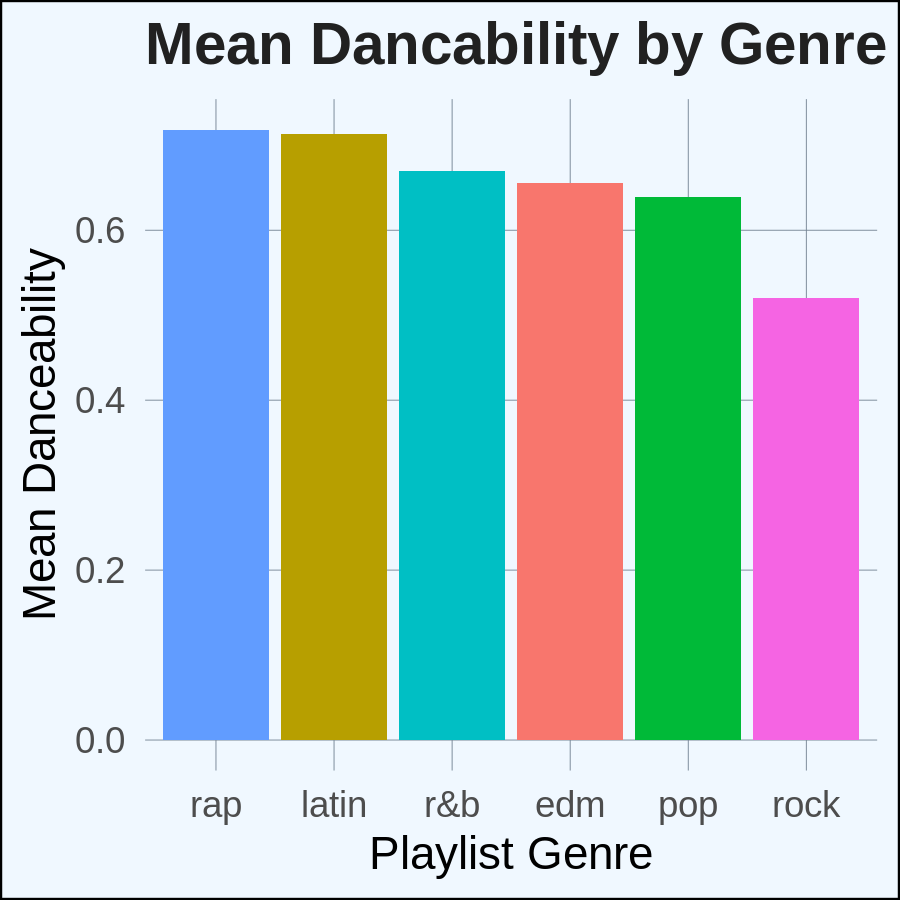

In [4]:
mean_dance <- songs %>% group_by(playlist_genre) %>% summarize(mean_d = mean(danceability))
options(repr.plot.width = 3, repr.plot.height = 3, repr.plot.res = 300)
p1 = ggplot(mean_dance, aes(x = reorder(playlist_genre, desc(mean_d)), y = mean_d, fill = playlist_genre))
p1 = p1 + geom_col()
p1 = p1 + labs(x = 'Playlist Genre', y = 'Mean Danceability') + theme_minimal() + theme(legend.position = 'none')
#p1 = p1 + scale_colour_manual(valuese = c())
p1 = p1 + labs(title = "Mean Dancability by Genre") + theme(plot.title = element_text(color="gray13", size=14, face="bold"))
p1 = p1 + theme(plot.background = element_rect(fill = "aliceblue"))
p1 = p1 + theme(panel.border = element_blank(),
          panel.grid.major = element_line(size = 0.1, linetype = 'solid',
                                colour = "slategray"), 
          panel.grid.minor = element_blank(),
          axis.line = element_blank())
p1

## Make mean score cols and scale

In [41]:
songs %>% group_by(playlist_genre) %>% summarize(mean_d = mean(danceability)) %>% mutate(d.scaled = scales::rescale(mean_d))
songs %>% group_by(playlist_genre) %>% summarize(mean_e = mean(energy)) %>% mutate(e.scaled = scales::rescale(mean_e))
songs %>% group_by(playlist_genre) %>% summarize(mean_l = mean(loudness)) %>% mutate(l.scaled = scales::rescale(mean_l))

`summarise()` ungrouping output (override with `.groups` argument)



playlist_genre,mean_d,d.scaled
<chr>,<dbl>,<dbl>
edm,0.6550409,0.6799274
latin,0.7132873,0.9743914
pop,0.6393017,0.6003582
r&b,0.6701793,0.7564598
rap,0.7183528,1.0000000
rock,0.5205480,0.0000000


`summarise()` ungrouping output (override with `.groups` argument)



playlist_genre,mean_e,e.scaled
<chr>,<dbl>,<dbl>
edm,0.8024759,1.0000000
latin,0.7083125,0.5548702
pop,0.7010278,0.5204343
r&b,0.5909343,0.0000000
rap,0.6507084,0.2825641
rock,0.7328133,0.6706905


`summarise()` ungrouping output (override with `.groups` argument)



playlist_genre,mean_l,l.scaled
<chr>,<dbl>,<dbl>
edm,-5.427445,1.0000000
latin,-6.264455,0.6565978
pop,-6.315328,0.6357258
r&b,-7.864848,0.0000000
rap,-7.042269,0.3374816
rock,-7.588895,0.1132160


# Let's look at the top playlist genre by danceability, Rap

In [6]:
rap <- songs %>% filter(playlist_genre == "rap")
edm <- songs %>% filter(playlist_genre == 'edm')

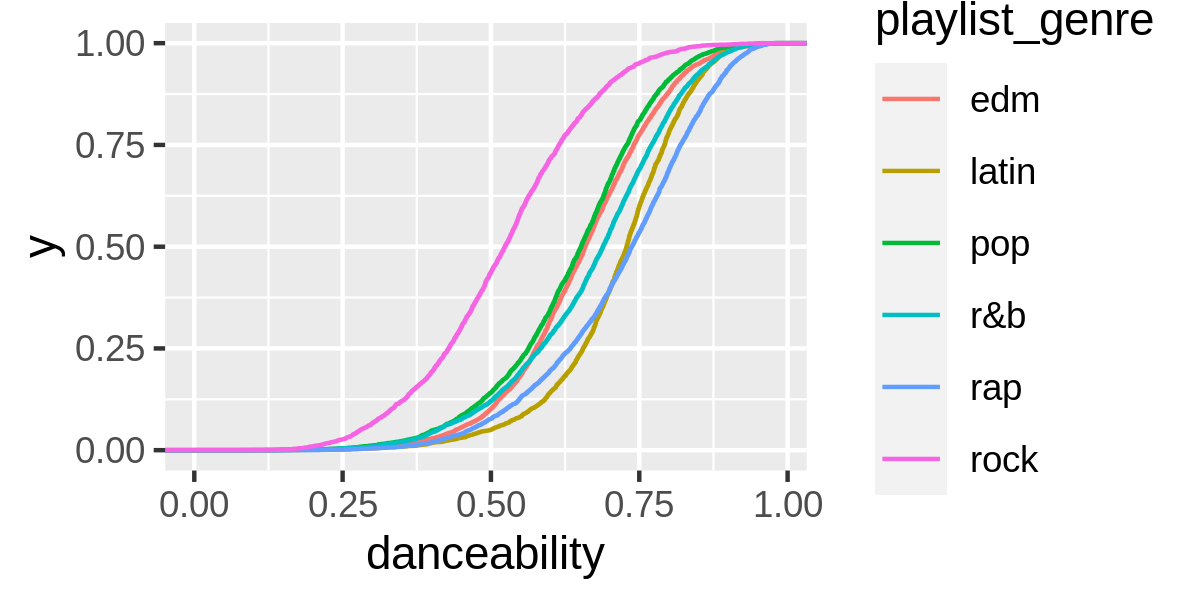

In [11]:
options(repr.plot.width = 4, repr.plot.height = 2, repr.plot.res = 300)
p2 = ggplot(songs, aes(x = danceability, color = playlist_genre))

p2 = p2 + stat_ecdf()

p2

I want like a tile with playlist genre on one axis, danceability, energy etc on another and color scaled for mean in each category to see in what categoried EDM does well in.

# Top artists in EDM

In [34]:
edm %>%
     group_by(track_artist) %>%
     count() %>%
     filter(n > 30)
     arrange(desc(n))

track_artist,n
<chr>,<int>
Armin van Buuren,38
Bassjackers,38
Blasterjaxx,38
Calvin Harris,40
David Guetta,60
Deorro,32
Dimitri Vegas & Like Mike,79
Hardwell,76
KSHMR,37


Warning message in is.na(x):
“is.na() applied to non-(list or vector) of type 'closure'”


ERROR: Error in x[!nas]: object of type 'closure' is not subsettable


# Let's look at the Top EDM artists

# Where does EDM beat out the others?

`summarise()` ungrouping output (override with `.groups` argument)



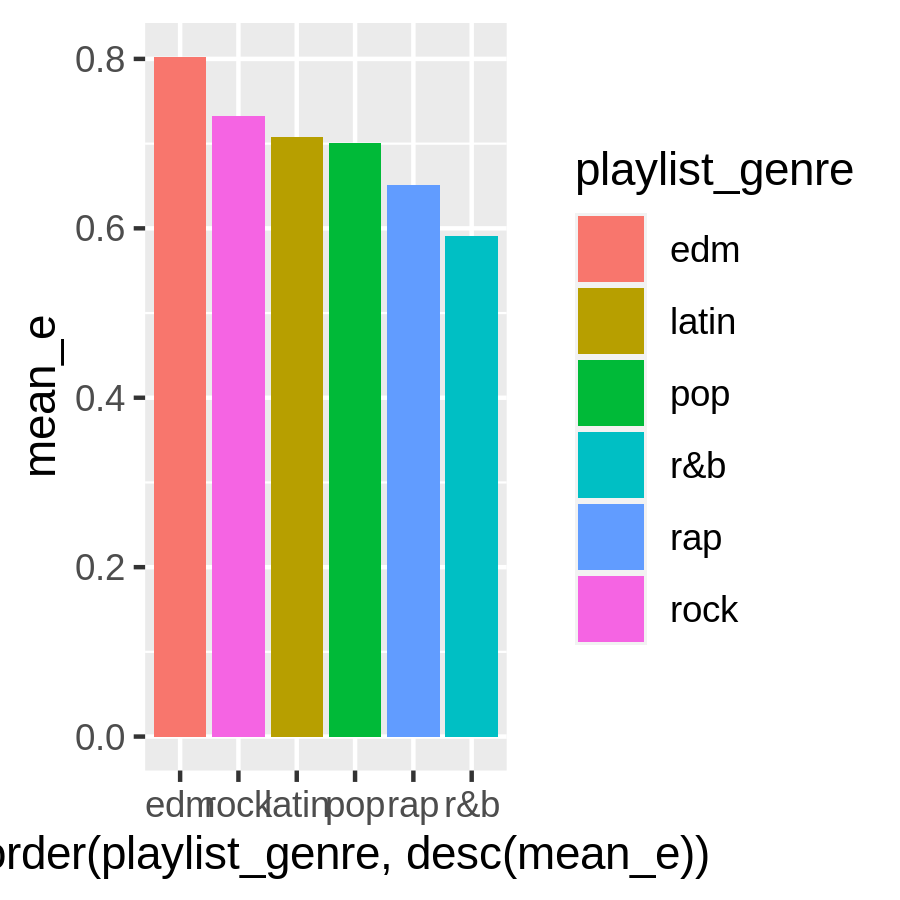

In [12]:
mean_dance <- songs %>% group_by(playlist_genre) %>% summarize(mean_e = mean(energy))
options(repr.plot.width = 3, repr.plot.height = 3, repr.plot.res = 300)
p3 = ggplot(mean_dance, aes(x = reorder(playlist_genre, desc(mean_e)), y = mean_e, fill = playlist_genre))
p3 = p3 + geom_col()
p3